In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset from a specific location as a DataFrame
dataset = pd.read_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv')
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.00
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.00
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.50
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,601983.0,278512.0,3.21,3.98,577.0,362.0,0.75
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0,0.75
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0,0.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0,0.25


-Assigning Positive and Negative scores to FOMC minutes, as well as counting frequency and observing trends over time of Positive and Negative Scores-

In [3]:
# Load Loughran and McDonald Sentiment Word List into a dictionary
sentiment_word_list = {}
positive_word_frequencies = {}
negative_word_frequencies = {}

with open("C:/Users/abact/Downloads/Loughran-McDonald_MasterDictionary_1993-2021.csv", 'r') as file:
    # Skip the header line
    next(file)

    for line in file:
        # Split the line by comma
        values = line.strip().split(',')

        # Extract the necessary values
        word = values[0].lower()
        positive = float(values[8])  # Positive column index is 8
        negative = float(values[9])  # Negative column index is 9

        # Assign the word as positive or negative based on the positive or negative values
        if positive > 0:
            sentiment_word_list[word] = 1
        elif negative > 0:
            sentiment_word_list[word] = -1

# Calculate net sentiment score for each datapoint
net_sentiment_scores = []
positive_word_frequencies = []
negative_word_frequencies = []

for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    net_sentiment = sum(sentiment_word_list.get(word, 0) for word in words)
    net_sentiment_scores.append(net_sentiment)
    
    positive_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == 1)
    positive_word_frequencies.append(positive_words)
    
    negative_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == -1)
    negative_word_frequencies.append(negative_words)

# Add 'Net Sentiment Score', 'Positive Frequency', and 'Negative Frequency' as new columns in the dataset
dataset['Net Sentiment Score'] = net_sentiment_scores
dataset['Positive Frequency'] = positive_word_frequencies
dataset['Negative Frequency'] = negative_word_frequencies

# Create 'Sentiment Label' column based on the net sentiment score
dataset['Sentiment Label'] = ['Positive' if score > 0 else 'Negative' for score in net_sentiment_scores]

In [4]:
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,...,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Sentiment Label
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,...,128854.0,2.93,6.26,604.0,315.0,NaN,-36,106,142,Negative
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,...,127395.0,2.92,5.97,701.0,315.0,0.00,2,89,87,Positive
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,...,130212.0,3.01,5.96,653.0,317.0,0.00,-33,62,95,Negative
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,...,128111.0,3.04,5.81,655.0,317.0,-0.50,-65,88,153,Negative
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,...,127233.0,3.01,5.36,726.0,319.0,0.00,-7,61,68,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,...,278512.0,3.21,3.98,577.0,362.0,0.75,-27,71,98,Negative
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,...,269783.0,4.04,3.89,582.0,363.0,0.75,-34,69,103,Negative
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,...,281966.0,4.23,3.62,636.0,363.0,0.50,-21,77,98,Negative
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,...,270825.0,4.54,3.75,631.0,363.0,0.25,-26,80,106,Negative


Time Series for Positive and Negative Word Frequency

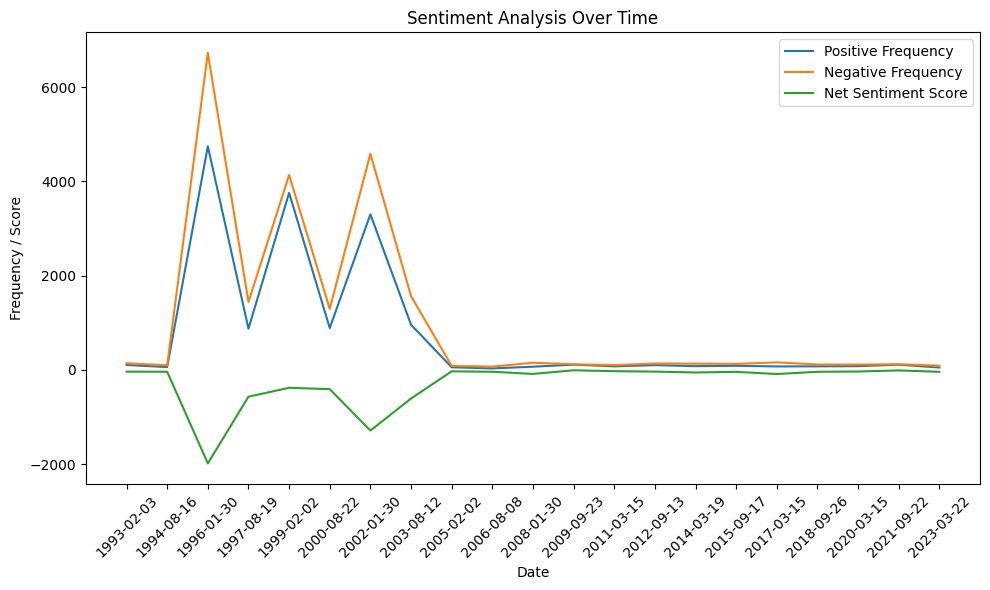

In [5]:
# Filter dataset to include every 12th date
filtered_dataset = dataset[::12]

# Extract the required data
dates = filtered_dataset['Date']
positive_frequency = filtered_dataset['Positive Frequency']
negative_frequency = filtered_dataset['Negative Frequency']
net_sentiment_score = filtered_dataset['Net Sentiment Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_frequency, label='Positive Frequency')
plt.plot(dates, negative_frequency, label='Negative Frequency')
plt.plot(dates, net_sentiment_score, label='Net Sentiment Score')

plt.xlabel('Date')
plt.ylabel('Frequency / Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

Creating Column Data for Positive and Negative Word frequency as well as Net Sentiment Score

In [6]:
last_20_positive = dataset['Positive Frequency'][-20:]
last_20_negative= dataset['Negative Frequency'][-20:]
last_20_net = dataset['Net Sentiment Score'][-20:]

combined_df = pd.concat([last_20_positive, last_20_negative, last_20_net], axis=1)
combined_df

,Positive Frequency,Negative Frequency,Net Sentiment Score
221,105,129,-24
222,112,107,5
223,155,131,24
224,126,106,20
225,118,123,-5
226,127,140,-13
227,142,171,-29
228,112,122,-10
229,112,102,10
230,116,143,-27


Calculating most often-used Positive and Negative Words

In [7]:
# Create dictionaries to store positive and negative word frequencies per row
positive_word_frequencies = {}
negative_word_frequencies = {}

# Iterate over each row in the preprocessed text
for index, datapoint in dataset['Preprocessed Text'].iteritems():
    words = datapoint.lower().split()  # Tokenize the text into words

    # Iterate over each word and check its sentiment
    for word in words:
        if word in sentiment_word_list:
            sentiment = sentiment_word_list[word]
            if sentiment == 1:
                positive_word_frequencies[word] = positive_word_frequencies.get(word, 0) + 1
            elif sentiment == -1:
                negative_word_frequencies[word] = negative_word_frequencies.get(word, 0) + 1

# Get the 10 most frequent positive words
top_positive_words = sorted(positive_word_frequencies, key=positive_word_frequencies.get, reverse=True)[:10]

# Get the 10 most frequent negative words
top_negative_words = sorted(negative_word_frequencies, key=negative_word_frequencies.get, reverse=True)[:10]

print("Top 10 Positive Words:")
for word in top_positive_words:
    print(f"{word}: {positive_word_frequencies[word]}")

print("\nTop 10 Negative Words:")
for word in top_negative_words:
    print(f"{word}: {negative_word_frequencies[word]}")


C:\Users\abact\AppData\Local\Temp\ipykernel_15592\1660354915.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, datapoint in dataset['Preprocessed Text'].iteritems():


Top 10 Positive Words:
stability: 10691
good: 9887
gain: 9566
strong: 8211
strength: 6654
favorable: 5772
despite: 4858
positive: 3594
strengthening: 3244
improvement: 3028

Top 10 Negative Words:
risk: 19105
somewhat: 15138
could: 14166
might: 12763
anticipated: 9005
suggested: 8972
appeared: 8182
may: 8116
uncertainty: 8002
possible: 4184


Calculating the number of words Per Minutes

In [9]:
# Create an empty list to store the word counts
word_counts = []

# Iterate over each row in the preprocessed text
for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    num_words = len(words)  # Calculate the number of words in the row
    word_counts.append(num_words)  # Add the word count to the list

# Print the word counts
print("Word Counts:")
for count in word_counts:
    print(count)

Word Counts:
6085
3520
3059
4268
2859
3045
3582
3502
6108
3871
3871
4022
2971
3108
3368
3443
4827
3060
4603
2692
4141
2950
3022
2988
231389
15282
16975
19898
20140
19661
20171
19941
56266
51364
52203
71523
49348
42634
55571
25738
246599
48807
62890
78222
57291
65547
91559
55537
165012
49878
49643
80204
86735
46981
49838
57214
171965
55666
43131
49729
44929
38460
59217
46098
198938
56315
56315
61389
56000
42043
50672
48214
151380
51826
40666
85917
94274
65178
108403
63792
138617
35232
3987
60789
42013
43637
48106
40006
15463
34611
3135
2967
35614
2628
2330
2536
2732
4384
2614
2727
2141
2299
2371
4102
2320
2848
35983
3014
2399
2794
2399
2703
4649
2616
2842
2624
2829
3543
7057
48062
6996
3793
8166
3252
2869
4968
4736
4015
18119
3906
5095
4318
4457
8600
4879
4025
6507
4247
4849
4034
3627
4338
4042
6191
4080
4664
4240
4010
4979
4576
6732
4619
3998
4539
4914
4421
4821
4181
4641
6671
4633
4439
5180
4624
4835
4459
5414
7247
5145
3746
4871
5107
5140
5335
7768
4183
5288
4918
5201
5447
4993
4806


Calculating Proportion of Positive and Negative Words relative to Minutes Length

In [12]:
# Calculate the proportions of positive words per minute for each row
positive_words_per_minute = dataset['Positive Frequency'] / word_counts

# Calculate the proportions of negative words per minute for each row
negative_words_per_minute = dataset['Negative Frequency'] / word_counts

# Print the proportions of positive and negative words per minute for each row
print("Proportions of Positive Words per Minute:")
for proportion in positive_words_per_minute:
    print(proportion)

print("\nProportions of Negative Words per Minute:")
for proportion in negative_words_per_minute:
    print(proportion)

Proportions of Positive Words per Minute:
0.017419884963023827
0.02528409090909091
0.020268061457992807
0.020618556701030927
0.021336131514515563
0.024630541871921183
0.022613065326633167
0.02541404911479155
0.018664047151277015
0.01834151382071816
0.01834151382071816
0.019393336648433616
0.020531807472231572
0.018018018018018018
0.022268408551068885
0.02120243973279117
0.02320281748498032
0.021895424836601306
0.015207473386921572
0.02600297176820208
0.02414875633904854
0.028135593220338984
0.023494374586366645
0.02643908969210174
0.020502271067336823
0.0200889935872268
0.019852724594992637
0.01673535028646095
0.014250248262164845
0.01653018666395402
0.019285112289921174
0.0226167193219999
0.01569331390182348
0.02114321314539366
0.026377794379633356
0.022132740517036478
0.01775147928994083
0.023432002627011304
0.024509186446167966
0.026497785375709067
0.02122068621527257
0.02659454586432274
0.021370647161710925
0.01993045434788167
0.021870799951126705
0.01537827818206783
0.014897497788

In [ ]:
# Calculate summary statistics
summary = dataset.describe()

summary

While Net Sentiment Score will suffice for model building, it is hard to interpret. As such, we will standardize the Net Sentiment Score around 0 and evaluate the magnitude of positivity and negativity around a 0 mean with standard deviations used to calculate magnitude above or below mean

In [ ]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the Net Sentiment Score column
net_sentiment_scores = dataset["Net Sentiment Score"].values.reshape(-1, 1)

# Scale the scores to the range of -1 to 1
scaled_scores = scaler.fit_transform(net_sentiment_scores)

# Add a new column for the scaled scores
dataset["Standardized Sentiment Score"] = scaled_scores

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dataset["Standardized Sentiment Score"])

In [ ]:
# Calculate summary statistics
summary = dataset.describe()

summary

# Calculate the number of missing values
missing_values = dataset.isnull().sum()

# Display summary statistics and number of missing values
summary_with_missing = summary.append(missing_values.rename("missing_values"))
print(summary_with_missing)

In [ ]:
# Create a copy of the dataset
clean_data_numeric = dataset.copy()

# Remove 'Federal_Reserve_Mins' and 'Preprocessed Text' columns
clean_data_numeric = clean_data_numeric.drop(['Federal_Reserve_Mins', 'Preprocessed Text'], axis=1)

# Display the resulting clean_data_numeric subset
clean_data_numeric.head()

Here, we move to further Exploratory Data Analysis. We begin with a correlation matrix to see if there are any endogenous correlations to a degree that one does not need to be included

In [ ]:
summary_stats = clean_data_numeric.describe(include='all')
print(summary_stats)

correlation_matrix = clean_data_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 10 highest correlation coefficients
top_10_correlations = correlation_values.head(10)

# Display the top 10 correlations
print(top_10_correlations)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in ascending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=True)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 10 lowest correlation coefficients
top_10_correlations = correlation_values.head(10)

# Display the top 10 correlations
print(top_10_correlations)

Z-scores are an important metric when calculating skewness. Any data that has an inherent trend will need to have that trend considered before being used for causal inference, as that skewness may have an endogenous explanation of its own.

In [ ]:
# Select only numeric columns
numeric_columns = clean_data_numeric.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column in the dataset
z_scores = stats.zscore(clean_data_numeric[numeric_columns])

# Create a new DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

z_scores

z_scores_df


In [ ]:
def calculate_z_scores(data):
    n = len(data)
    if data.dtype.kind in ['i', 'f']:  # Check if data is numeric
        observed_skewness = skew(data)
        observed_kurtosis = kurtosis(data)

        expected_skewness = 0
        expected_kurtosis = 0

        standard_error_skewness = np.sqrt(6 / n)
        standard_error_kurtosis = np.sqrt(24 / n)

        z_score_skewness = (observed_skewness - expected_skewness) / standard_error_skewness
        z_score_kurtosis = (observed_kurtosis - expected_kurtosis) / standard_error_kurtosis

        return z_score_skewness, z_score_kurtosis
    else:
        return None, None


# Calculate z-scores for skewness and kurtosis for each column in the dataset
z_scores = {}
for column in dataset.columns:
    z_score_skewness, z_score_kurtosis = calculate_z_scores(dataset[column])
    if z_score_skewness is not None and z_score_kurtosis is not None:
        z_scores[column] = (z_score_skewness, z_score_kurtosis)

# Print the z-scores for each column
for column, (z_score_skewness, z_score_kurtosis) in z_scores.items():
    print("Column:", column)
    print("Z-score for skewness:", z_score_skewness)
    print("Z-score for kurtosis:", z_score_kurtosis)
    print()

In [ ]:
clean_data_numeric

Time plots are a good way to view trends and skewness, as well as eyeballing which variables seem to have relevance to the outcome variable and which need cleaning.

In [ ]:
for column in clean_data_numeric.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(clean_data_numeric['Date'], clean_data_numeric[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(clean_data_numeric['Date'][::12], rotation=45)

    # Convert column values to numeric
    y = pd.to_numeric(clean_data_numeric[column], errors='coerce')
    
    # Calculate the line of best fit
    x = np.arange(len(clean_data_numeric['Date']))
    slope, intercept, _, _, _ = linregress(x, y)
    line = slope * x + intercept

    plt.plot(x, line, color='red')
    plt.show()

Analyzing autocorrelations is a natural next step, as they tell us if there are any lagged or seasonal effects at work for each of our variables. If there are, then we can account for these lagged effects in predicting the outcome variable.

In [ ]:
# Iterate over each column (excluding 'Date' and 'Sentiment Label')
for column in clean_data_numeric.columns:
    if column not in ['Date', 'Sentiment Label']:
        # Compute the autocorrelation
        acf = sm.tsa.acf(clean_data_numeric[column], nlags=10)
        
        # Plot the autocorrelation
        plt.stem(range(len(acf)), acf)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation Plot of {column}')
        plt.show()

In [ ]:
# Split into training, validation, and test sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Verify the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

train_data.to_csv(r'C:\Users\abact\BC-Project\data\train_data.csv', index=False)
temp_data.to_csv(r'C:\Users\abact\BC-Project\data\temp_data.csv', index=False)
val_data.to_csv(r'C:\Users\abact\BC-Project\data\val_data.csv', index=False)